In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [77]:
df=pd.read_csv("web_interface/sbi.csv")
df=df.loc[::-1]

In [78]:
# df=df.reset_index(drop=True)


In [79]:
df

,Unnamed: 0,Date,open,high,low,close,volume,unknown
3440,3440,2007-01-02,125.00,126.00,124.30,125.36,4081440,0
3439,3439,2007-01-03,125.00,126.99,123.71,126.49,6825540,0
3438,3438,2007-01-04,127.00,128.00,123.72,124.30,6544400,0
3437,3437,2007-01-05,124.10,125.78,123.31,124.41,6962270,0
3436,3436,2007-01-08,124.88,124.88,120.71,121.37,8747010,0
...,...,...,...,...,...,...,...,...
4,4,2020-11-14,232.00,232.90,227.75,229.65,7753219,0
3,3,2020-11-17,231.85,241.60,231.00,240.20,80501583,0
2,2,2020-11-18,239.40,253.00,237.90,252.00,104514060,0
1,1,2020-11-19,248.00,251.80,239.00,239.75,82284278,0


In [80]:
# convert date in string to Dateobject
# df['Date']=df['Date'].apply(lambda x : x.split("T")[0])
df['Date']=df['Date'].apply(lambda x :datetime.strptime(x, '%Y-%m-%d').date())

In [81]:
df.index=df.pop("Date")

In [82]:
# df.to_csv("HDFCBANK.csv")
# df.to_csv("axis.csv")

<Axes: xlabel='Date'>

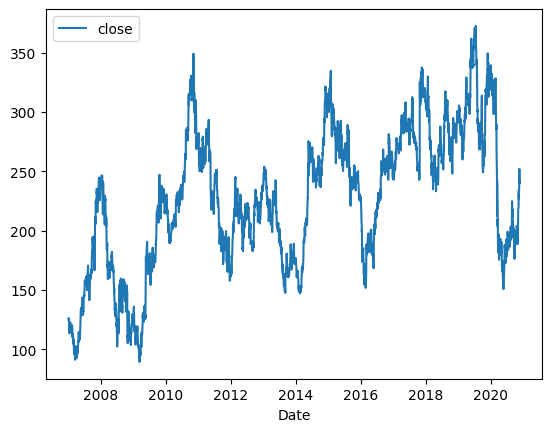

In [83]:
df.plot.line(y="close", use_index= True)

In [84]:
df1=df['close']

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [86]:
df1,len(df1)

(array([[0.12666596],
        [0.13066073],
        [0.12291866],
        ...,
        [0.57436278],
        [0.53105667],
        [0.54166225]]),
 3441)

In [87]:
#splitting the date to train and test
train_size=int(len(df1)*0.7)
valid_point=int(len(df1)*0.8)
test_size=len(df1)-valid_point
train_data,valid_data,test_data=df1[:train_size],df1[train_size:valid_point],df1[valid_point:]

In [88]:
train_size,valid_point-train_size,test_size

(2408, 344, 689)

In [89]:
df

,Unnamed: 0,open,high,low,close,volume,unknown
Date,,,,,,,
2007-01-02,3440,125.00,126.00,124.30,125.36,4081440,0
2007-01-03,3439,125.00,126.99,123.71,126.49,6825540,0
2007-01-04,3438,127.00,128.00,123.72,124.30,6544400,0
2007-01-05,3437,124.10,125.78,123.31,124.41,6962270,0
2007-01-08,3436,124.88,124.88,120.71,121.37,8747010,0
...,...,...,...,...,...,...,...
2020-11-14,4,232.00,232.90,227.75,229.65,7753219,0
2020-11-17,3,231.85,241.60,231.00,240.20,80501583,0
2020-11-18,2,239.40,253.00,237.90,252.00,104514060,0


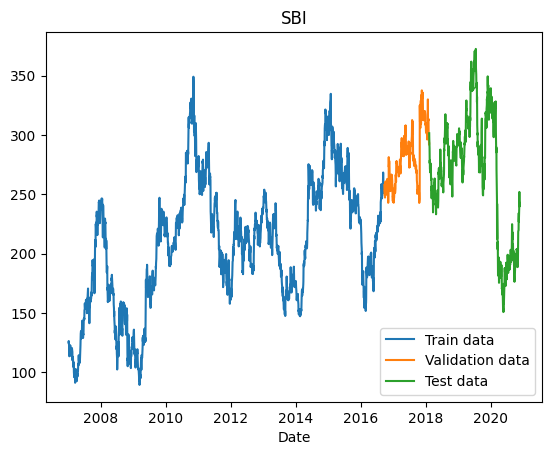

In [91]:
# plots
df[:train_size]['close'].plot.line(use_index= True)
df[train_size:valid_point]['close'].plot.line(use_index= True)
df[valid_point:]['close'].plot.line(use_index= True)
plt.legend(["Train data","Validation data","Test data"])
plt.title("SBI")
# plt.savefig('sbi_data.jpg')

In [27]:
def dataset(data,window_size=1):
    dataX, dataY = [], []
    for i in range(len(data)-window_size-1):
        a = data[i:(i+window_size), 0] 
        dataX.append(a)
        dataY.append(data[i + window_size, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
window_size = 30
x_train, y_train = dataset(train_data, window_size)
x_valid,y_valid=dataset(valid_data, window_size)
x_test, y_test = dataset(test_data,window_size)

In [29]:
x_train.shape,y_train.shape

((2377, 30), (2377,))

In [30]:
x_valid.shape,y_valid.shape

((313, 30), (313,))

In [31]:
x_test.shape,y_test.shape

((658, 30), (658,))

In [32]:
# Reshape data to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_valid =x_valid.reshape(x_valid.shape[0],x_valid.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [33]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

38/38 [==============================] - 8s 75ms/step - loss: 0.0559 - val_loss: 0.0074
Epoch 2/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 3/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 4/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 5/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 6/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 7/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 8/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 9/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 10/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0016 - val_loss: 0.004

38/38 [==============================] - 2s 44ms/step - loss: 3.7141e-04 - val_loss: 5.6390e-04
Epoch 77/100
38/38 [==============================] - 2s 42ms/step - loss: 3.6222e-04 - val_loss: 8.3611e-04
Epoch 78/100
38/38 [==============================] - 2s 43ms/step - loss: 3.9679e-04 - val_loss: 5.6147e-04
Epoch 79/100
38/38 [==============================] - 2s 40ms/step - loss: 3.6716e-04 - val_loss: 6.0456e-04
Epoch 80/100
38/38 [==============================] - 2s 42ms/step - loss: 3.3225e-04 - val_loss: 7.0907e-04
Epoch 81/100
38/38 [==============================] - 2s 42ms/step - loss: 3.5163e-04 - val_loss: 5.4815e-04
Epoch 82/100
38/38 [==============================] - 2s 44ms/step - loss: 3.1516e-04 - val_loss: 5.6172e-04
Epoch 83/100
38/38 [==============================] - 2s 42ms/step - loss: 3.5443e-04 - val_loss: 6.6329e-04
Epoch 84/100
38/38 [==============================] - 2s 43ms/step - loss: 3.4646e-04 - val_loss: 5.5148e-04
Epoch 85/100
38/38 [============

In [37]:
import tensorflow as tf

In [47]:
train_predict=model.predict(x_train)
valid_predict=model.predict(x_valid)
test_predict=model.predict(x_test)

21/21 [==============================] - 0s 11ms/step


In [48]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
valid_predict=scaler.inverse_transform(valid_predict)
test_predict=scaler.inverse_transform(test_predict)

y_train=scaler.inverse_transform(y_train.reshape(len(y_train),1))
y_valid=scaler.inverse_transform(y_valid.reshape(len(y_valid),1))
y_test=scaler.inverse_transform(y_test.reshape(len(y_test),1))

In [551]:
# with open("sbi_model",'rb') as file:
#     sbi_model=pickle.load(file)
# test_predict=sbi_model.predict(x_test)

# Predict any date

In [ ]:
temp=df[60:90]['close'].tolist()

In [73]:
temp=scaler.fit_transform(np.array(temp).reshape(-1,1))
temp=temp.reshape(temp.shape[1],30,1)
pre=model.predict(temp)
pre=scaler.inverse_transform(pre)

1/1 [==============================] - 0s 27ms/step


In [136]:
pre

array([[101.68704]], dtype=float32)

In [57]:
predict=np.zeros(train_size-len(train_predict))
predict=np.append(predict,train_predict)
predict=np.append(predict,np.zeros(valid_point-train_size-len(valid_predict)))
predict=np.append(predict,valid_predict)
predict=np.append(predict,np.zeros(len(df)-valid_point-len(test_predict)))
predict=np.append(predict,test_predict)


In [60]:
df['predicted']=predict

In [62]:
df[30:]

,Unnamed: 0,open,high,low,close,volume,unknown,predicted
Date,,,,,,,,
2007-02-15,3410,46.20,47.90,45.92,46.42,3999575,0,0.000000
2007-02-19,3409,48.98,48.98,43.00,45.38,2316380,0,46.530704
2007-02-20,3408,45.40,45.58,44.60,45.21,1668710,0,46.421761
2007-02-21,3407,45.26,45.54,44.80,45.12,2341255,0,46.128529
2007-02-22,3406,44.44,45.75,42.80,43.27,5139210,0,45.803856
...,...,...,...,...,...,...,...,...
2020-11-14,4,47.15,47.20,46.40,46.65,2862425,0,46.708759
2020-11-17,3,46.70,47.90,46.70,47.55,21494471,0,46.377712
2020-11-18,2,47.15,49.90,47.00,49.60,52946624,0,46.446400


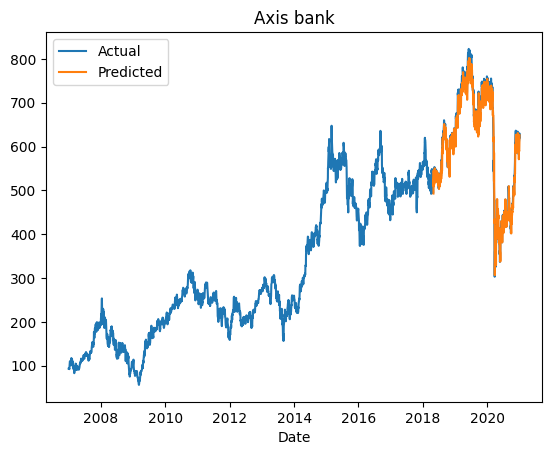

In [555]:
df['close'].plot.line(use_index= True)
# df[:train_size]['predicted'].plot.line(use_index= True)
df[valid_point+31:]['predicted'].plot.line(use_index= True)
plt.title("Axis bank")
plt.legend(['Actual',"Predicted"])
plt.savefig("axis_prediction.jpg")

In [556]:
import math
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_train,train_predict)


0.021689526208780924

In [557]:
mean_absolute_percentage_error(y_test,test_predict)

0.023076392235016136

In [558]:
accuracy=(1-mean_absolute_percentage_error(y_test,test_predict))*100

In [559]:
accuracy

97.69236077649839

In [560]:
import pickle


In [561]:
with open("axis_model",'wb') as file:
    pickle.dump(model,file)

In [562]:
# sbi=97.42
# hdfc=98.26
# icici=97.69
# kotak=97.106
# indusind=97.25
# pnb=95.86
# bob=97.66
# axis=97.69